# Init

In [80]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pathlib import Path
%cd ..
%load_ext autoreload

import plotly.graph_objects as go

c:\Users\kepes\Projects
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
%autoreload 2
from src.MapData import MapData
from src.LineFinder import LineFinder

from src.plotting_functions import plot_embedding, plot_single_variable_map

In [3]:
map_data = MapData('./data/2022_03_22_P56B_307x532.libsdata')
map_data.get_metadata()
map_data.load_wavelenths()

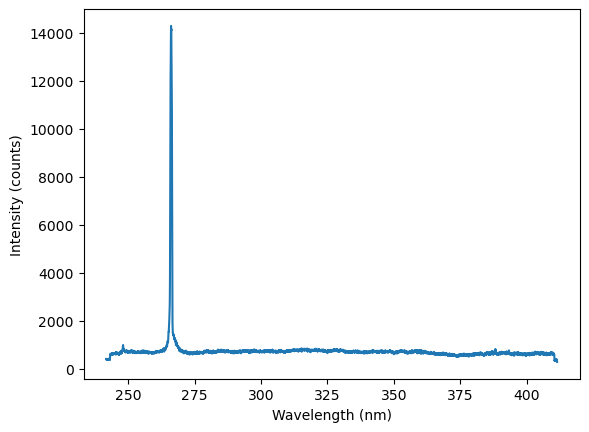

In [6]:
map_data.plot_random_spectrum(return_fig=False)

In [7]:
map_data.load_all_data()
map_data.get_map_dimensions()
map_data.trim_spectra(64)

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:168: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


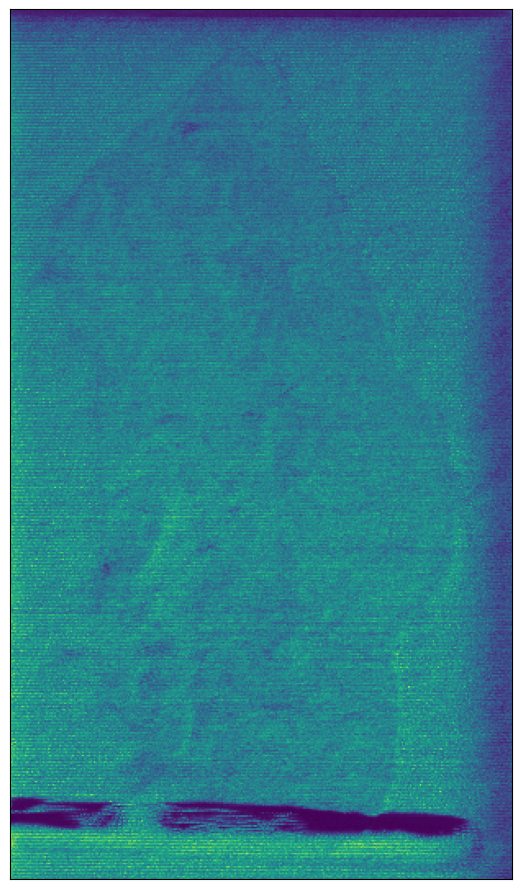

In [8]:
full_emissivities = map_data.spectra.sum(axis=1)

full_emissivities = full_emissivities.reshape(map_data.map_dimensions[::-1])
full_emissivities[::2,:] = full_emissivities[::2,::-1]

plot_single_variable_map(
    full_emissivities,
    f'total_emissivity_map',
    save_cond=False,
    fig_size_scaling=3
)

# scan direction dependent statistics

In [9]:
dir_right = map_data.spectra[::2]
dir_left = map_data.spectra[1::2]

(array([5.600e+01, 1.840e+02, 1.810e+02, 9.600e+01, 1.470e+02, 2.770e+02,
        3.420e+02, 3.160e+02, 3.970e+02, 4.650e+02, 5.070e+02, 5.770e+02,
        7.130e+02, 9.730e+02, 1.364e+03, 1.808e+03, 2.607e+03, 3.248e+03,
        4.058e+03, 4.236e+03, 4.620e+03, 4.651e+03, 4.803e+03, 4.636e+03,
        4.456e+03, 4.270e+03, 3.857e+03, 3.329e+03, 3.010e+03, 2.609e+03,
        2.391e+03, 1.995e+03, 1.805e+03, 1.512e+03, 1.320e+03, 1.187e+03,
        9.180e+02, 8.430e+02, 7.510e+02, 6.980e+02, 5.700e+02, 5.370e+02,
        4.400e+02, 3.960e+02, 3.800e+02, 3.510e+02, 2.540e+02, 2.600e+02,
        2.210e+02, 2.180e+02, 1.910e+02, 1.780e+02, 1.570e+02, 1.310e+02,
        1.280e+02, 1.180e+02, 1.200e+02, 8.900e+01, 7.200e+01, 6.900e+01,
        7.400e+01, 5.300e+01, 6.000e+01, 5.500e+01, 4.300e+01, 3.600e+01,
        4.000e+01, 2.700e+01, 3.300e+01, 2.600e+01, 1.300e+01, 1.900e+01,
        1.600e+01, 1.200e+01, 1.100e+01, 1.200e+01, 5.000e+00, 4.000e+00,
        5.000e+00, 4.000e+00, 2.000e+0

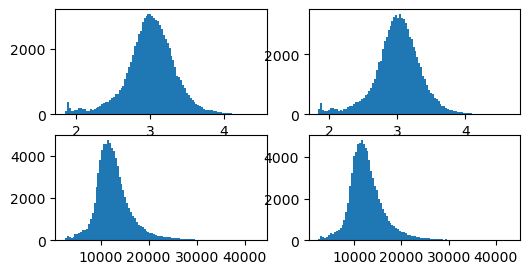

In [10]:
BIN_COUNT = 100
fig,ax = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(6,3)
)
ax[0,0].hist(
  dir_right.sum(axis=1),
  bins=BIN_COUNT
)
ax[0,1].hist(
  dir_left.sum(axis=1),
  bins=BIN_COUNT
)
ax[1,0].hist(
  dir_right.max(axis=1),
  bins=BIN_COUNT
)
ax[1,1].hist(
  dir_left.max(axis=1),
  bins=BIN_COUNT
)

In [11]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
      y=np.squeeze(dir_right[1,:]),
      name='right'
    )
)
fig.add_trace(
    go.Scatter(
      y=np.squeeze(dir_left[0,:]),
      name='left'
    )
)

## normalize to unit maxima

In [30]:
plot_data = np.divide(
    map_data.spectra,
    map_data.spectra.max(axis=1,keepdims=True)
)

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:168: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



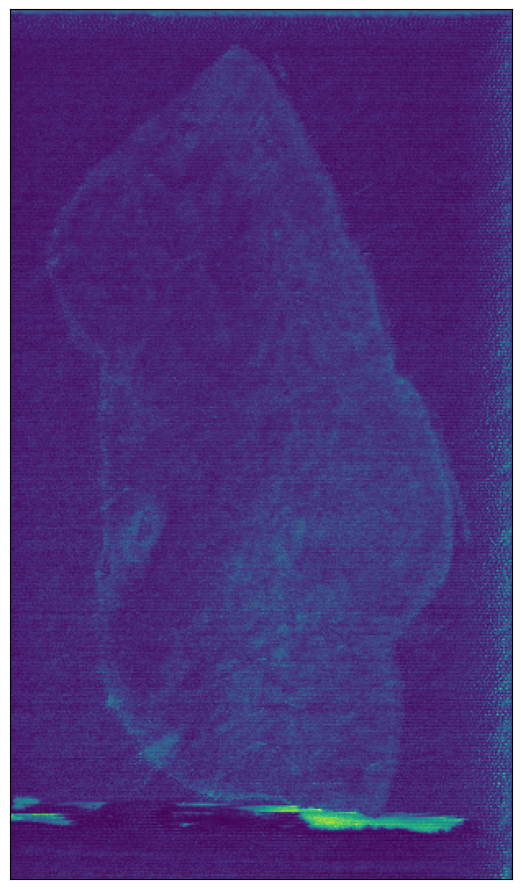

In [31]:
full_emissivities = plot_data.sum(axis=1)

full_emissivities = full_emissivities.reshape(map_data.map_dimensions[::-1])
full_emissivities[::2,:] = full_emissivities[::2,::-1]

plot_single_variable_map(
    full_emissivities,
    f'total_emissivity_map',
    save_cond=False,
    fig_size_scaling=3
)

## baseline correct

In [16]:
map_data.get_baseline(50,100)

In [17]:
map_data.align_baselines_with_spectra()
map_data.baseline_correct()

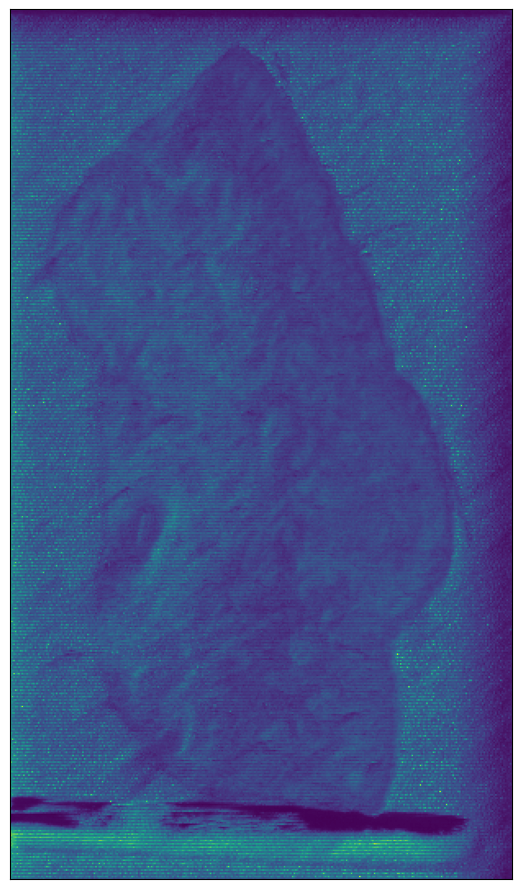

In [18]:
full_emissivities = map_data.spectra.sum(axis=1)

full_emissivities = full_emissivities.reshape(map_data.map_dimensions[::-1])
full_emissivities[::2,:] = full_emissivities[::2,::-1]

plot_single_variable_map(
    full_emissivities,
    f'total_emissivity_map',
    save_cond=False,
    fig_size_scaling=3
)

## Emission line intensities

In [59]:
counts, bin_centers = np.histogram(full_emissivities,bins=100)
total_counts = np.sum(counts)
cutoff_bin = bin_centers[:-1][np.cumsum(counts) >= (total_counts * .99)][0]

C:\Users\kepes\AppData\Local\Temp\ipykernel_4024\3989469395.py:21: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



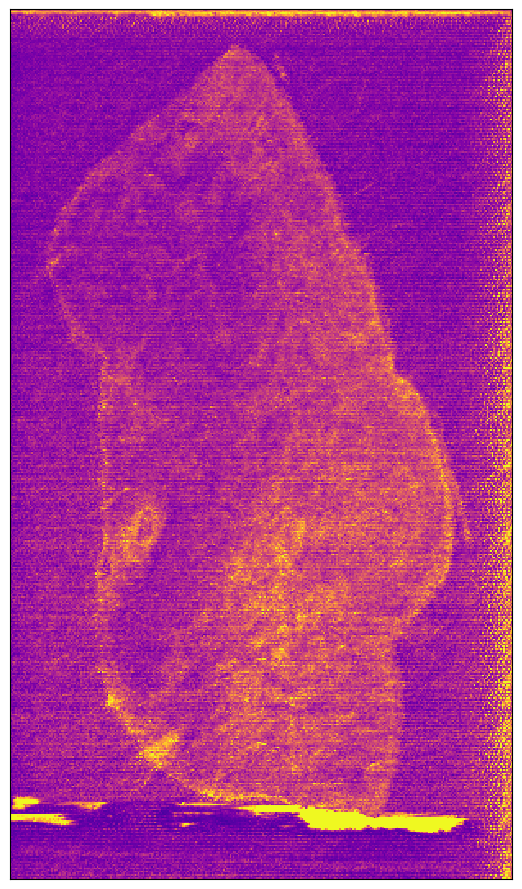

In [63]:
fig, ax = plt.subplots(
    1, 1,
    figsize=(9,9)
)
ax.imshow(
    full_emissivities,
    cmap='plasma',
    interpolation='none',
    interpolation_stage='rgba',
    vmin=bin_centers[0]*.9,
    vmax=cutoff_bin
)

# fig.colorbar()

ax.set_xticks([])
ax.set_yticks([])
ax.axes.set_alpha(0)

fig.tight_layout()
fig.show()


In [88]:
max_spectrum = map_data.spectra.max(axis=0)

line_finder = LineFinder(
    max_spectrum,
    map_data.wvl,
    name='maxima'
)

In [228]:
line_finder.find_lines(
    height=250,
    threshold=None,
    distance=None,
    prominence=200,
    width=3,
    wlen=27,
    rel_height=1.2,
)

# line_finder.plot_found_lines()
line_finder.load_nist_tables(
    Path('C:/Users/kepes/OneDrive - Vysoké učení technické v Brně/projects/marsData/inventory/nistTables')
)
line_finder.find_peaks_in_reference(
    max_spectrum, 
    scale=False,
    show_cond=False
)

c:\Users\kepes\Projects\segmentation\src\plotting_functions.py:192: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



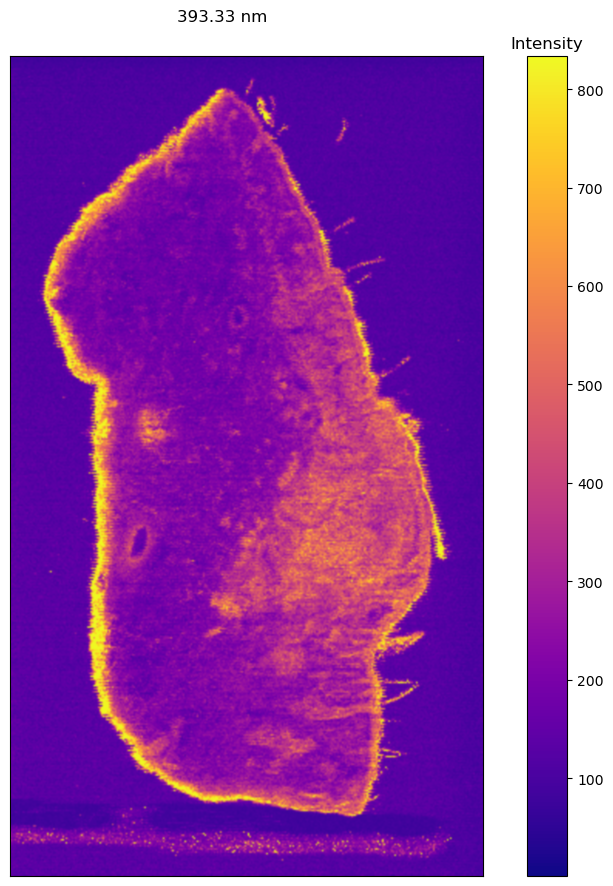

In [235]:
chosen_line_ndx = 17

line_intensities = map_data.spectra[
    :,
    line_finder.peaks[1].get('left_bases')[chosen_line_ndx]:
    line_finder.peaks[1].get('right_bases')[chosen_line_ndx]
].max(axis=1)

line_intensities = line_intensities.reshape(map_data.map_dimensions[::-1])
line_intensities[::2,:] = line_intensities[::2,::-1]

plot_single_variable_map(
    line_intensities,
    colorbar_title='Intensity',
    figure_title=f'{map_data.wvl[line_finder.peaks[0][chosen_line_ndx]]:.2f} nm',
    fig_size_scaling=3
)

## Segmentation single intensity map

In [179]:
line_intensities /= np.max(line_intensities)

In [223]:
import cv2
from PIL import Image, ImageColor, ImageTk
from skimage import filters, segmentation, io, img_as_float, color
from skimage.measure import label, regionprops

grayscale_image = np.uint8(line_intensities * 255)
threshold_value = filters.threshold_otsu(grayscale_image)
binary_image = grayscale_image > threshold_value
label_image = label(binary_image)
# self.regions = iter([
#     region
#     for region
#     in regionprops(self.label_image)
#     if region.area >= 100
# ])

# self.label_image = Image.fromarray(
#     self.label_image.astype('uint8'),
#     mode='P'
# )

# photo_label = ImageTk.PhotoImage(self.label_image)

# self.label_label.configure(image=photo_label)
# self.label_label.image = photo_label


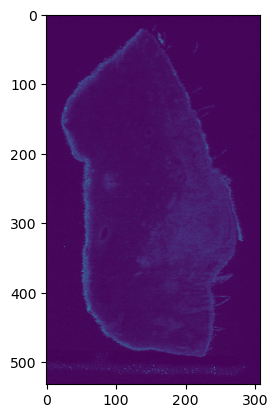

In [225]:
plt.imshow(grayscale_image)